In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# For better chart display
%matplotlib inline


In [3]:
def assign_group(user_id):
    random.seed(user_id)
    return 'A' if random.random() < 0.5 else 'B'

def generate_user_data(n_users=1000):
    users = []
    for user_id in range(1, n_users+1):
        group = assign_group(user_id)
        # Simulate behavior: B performs slightly better
        clicked = 1 if (group == 'B' and random.random() < 0.40) or (group == 'A' and random.random() < 0.30) else 0
        users.append({'user_id': user_id, 'group': group, 'clicked': clicked})
    return pd.DataFrame(users)

df = generate_user_data()
df.head()


,user_id,group,clicked
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,1
4,5,B,0


In [4]:
# Group-wise conversion rate
conversion_rates = df.groupby('group')['clicked'].mean().reset_index()
conversion_rates.columns = ['Group', 'Conversion Rate']
conversion_rates


,Group,Conversion Rate
0,A,0.260194
1,B,0.414433


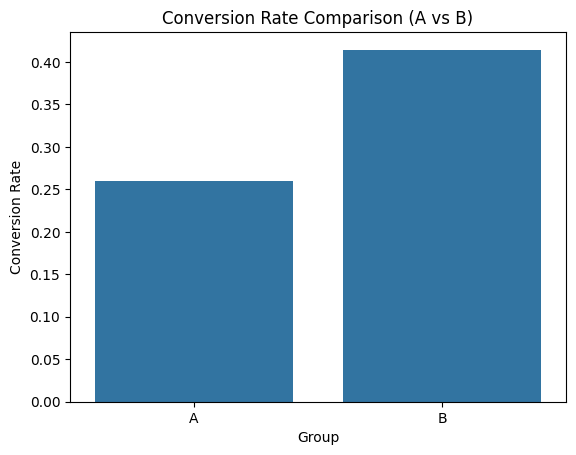

In [5]:
sns.barplot(x='Group', y='Conversion Rate', data=conversion_rates)
plt.title('Conversion Rate Comparison (A vs B)')
plt.ylabel('Conversion Rate')
plt.show()


In [6]:
group_a = df[df['group'] == 'A']['clicked']
group_b = df[df['group'] == 'B']['clicked']

t_stat, p_val = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically Significant: Group B performs better!")
else:
    print("❌ Not statistically significant: No strong evidence of difference.")


T-statistic: -5.2296
P-value: 0.0000
✅ Statistically Significant: Group B performs better!


In [7]:
df.to_csv("user_ab_test_data.csv", index=False)
